# Tugas Akhir ITS05 Kel. 08

## Analisis Time Series untuk Penjualan Alkes Menggunakan ARIMA

## 1. Business Understanding

## 2. Data Understanding

In [1]:
# import librari yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# load data 
dts=pd.read_csv('detail_penjualan_4.csv', header=0,parse_dates=True, index_col='tgl_jual')

In [3]:
# cek lima data awal
dts=dts.copy()
dts.head()

,id,no_faktur,idbarang,sn,qtt,hrg_jual,pot_onf,pot_off,hrg_beli,nama_barang,satuan,idkategori,nama_kategori,merek,nama_merek,idcustomer,nama_customer,alamat,kota
tgl_jual,,,,,,,,,,,,,,,,,,,
2016-01-04,4114,5166,61008,NaN,1,1735000.0,0.0,0.0,1400000,LIOFILCHEM Brain Heart Infusion Broth 500gram,Botol,30,Mikrobiologi,187,LIOFILCHEM,28,Lab Sano,Jl. Buana Raya. Padangsambian. Denpasar Bar.. ...,DENPASAR
2016-01-04,4115,5312,610040,NaN,1,1245000.0,0.0,186750.0,954000,LIOFILCHEM Plate Count Agar 500gram,Botol,30,Mikrobiologi,187,LIOFILCHEM,29,Lab Hidro,Jl. Raya Abianbase. Kapal. Mengwi - Badung,Badung
2016-01-04,4116,5312,610028,NaN,1,1190000.0,0.0,178500.0,0,LIOFILCHEM-MacConkey Agar 500gram,Botol,30,Mikrobiologi,187,LIOFILCHEM,29,Lab Hidro,Jl. Raya Abianbase. Kapal. Mengwi - Badung,Badung
2016-01-04,4117,5312,611202,NaN,1,1400000.0,0.0,210000.0,795000,LIOFILCHEM Lactose Broth 500gram,Botol,30,Mikrobiologi,187,LIOFILCHEM,29,Lab Hidro,Jl. Raya Abianbase. Kapal. Mengwi - Badung,Badung
2016-01-04,4118,5312,611402,NaN,1,2300000.0,0.0,345000.0,1696000,LIOFILCHEM Carry Blair Medium 500gram,Botol,30,Mikrobiologi,187,LIOFILCHEM,29,Lab Hidro,Jl. Raya Abianbase. Kapal. Mengwi - Badung,Badung


In [4]:
# cek lima data akhir
dts.tail()

,id,no_faktur,idbarang,sn,qtt,hrg_jual,pot_onf,pot_off,hrg_beli,nama_barang,satuan,idkategori,nama_kategori,merek,nama_merek,idcustomer,nama_customer,alamat,kota
tgl_jual,,,,,,,,,,,,,,,,,,,
2019-12-31,23287,9139,D1-008E,NaN,1,7800000.0,780000.0,780000.0,\N,CORNLEY Reagent Pack Electrolite,Box,28,Diagnostic 1,74,CORNLEY,46,RSU Dharma Yadnya,Jl. WR. Supratman No. 256. Tohati. Jl. Wage Ru...,Denpasar
2019-12-31,23288,9140,GD050A,NaN,3,180000.0,0.0,18000.0,\N,GD-Vaccum Tube Sterile Clot Activator 5ml,Box,28,Diagnostic 1,121,GD,59,RS Santi Graha,Desa Tanguisiu. Seririt. Banjar Dinas Taman Sa...,Tabanan
2019-03-29,24346,4982-1,CM337B,NaN,3,2500000.0,0.0,200000.0,1034110,OXOID Mueller Hinton Agar 500gram,Botol,30,Mikrobiologi,242,OXOID,17,RSUP Sanglah,Jalan Diponegoro. Dauh Puri Klod. Denpasar Bar...,DENPASAR
2019-04-08,24299,5050-1,51304,NaN,2,7050000.0,0.0,564000.0,4746720,Qiagen QIAamp DNA Minikit (50),Box,30,Mikrobiologi,261,QIAGEN,17,RSUP Sanglah,Jalan Diponegoro. Dauh Puri Klod. Denpasar Bar...,DENPASAR
2019-03-29,24347,4982-2,CM337B,NaN,2,2500000.0,0.0,200000.0,1034110,OXOID Mueller Hinton Agar 500gram,Botol,30,Mikrobiologi,242,OXOID,17,RSUP Sanglah,Jalan Diponegoro. Dauh Puri Klod. Denpasar Bar...,DENPASAR


In [5]:
#cek type data
dts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17107 entries, 2016-01-04 to 2019-03-29
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17107 non-null  int64  
 1   no_faktur      17107 non-null  object 
 2   idbarang       17103 non-null  object 
 3   sn             0 non-null      float64
 4   qtt            17107 non-null  int64  
 5   hrg_jual       17107 non-null  float64
 6   pot_onf        17107 non-null  float64
 7   pot_off        17107 non-null  float64
 8   hrg_beli       17107 non-null  object 
 9   nama_barang    17107 non-null  object 
 10  satuan         17051 non-null  object 
 11  idkategori     17107 non-null  object 
 12  nama_kategori  17107 non-null  object 
 13  merek          17107 non-null  object 
 14  nama_merek     17107 non-null  object 
 15  idcustomer     17107 non-null  int64  
 16  nama_customer  17107 non-null  object 
 17  alamat         16326 non-null  ob

In [6]:
# karena tidak semua fitur digunakan, maka dilakukan penghapusan fitur yang tidak digunakan
# fitur yang dipertahankan untuk analisis adalah 'tgl_jual', 'qtt', 'kota', 'nama_kategori'
# fitur 'kota' dan 'nama_kategori' digunakan untuk mengelompokkan dataset per kota per nama_kategori..agar dapat melakukan prediksi jumlah barang yang dapat dijual untuk setiap kategori di kota tertentu
dt_an=dts.drop(['id', 'no_faktur', 'idbarang', 'sn', 'pot_onf',
       'pot_off', 'hrg_beli','nama_barang', 'satuan',
       'idkategori', 'merek', 'nama_merek', 'idcustomer','hrg_jual',
       'nama_customer', 'alamat'],axis='columns')

In [7]:
# kota dan nama_kategori dibuat kapital
dt_an['kota']=dt_an['kota'].str.upper()
dt_an['nama_kategori']=dt_an['nama_kategori'].str.upper()
dt_an

,qtt,nama_kategori,kota
tgl_jual,,,
2016-01-04,1,MIKROBIOLOGI,DENPASAR
2016-01-04,1,MIKROBIOLOGI,BADUNG
2016-01-04,1,MIKROBIOLOGI,BADUNG
2016-01-04,1,MIKROBIOLOGI,BADUNG
2016-01-04,1,MIKROBIOLOGI,BADUNG
...,...,...,...
2019-12-31,1,DIAGNOSTIC 1,DENPASAR
2019-12-31,3,DIAGNOSTIC 1,TABANAN
2019-03-29,3,MIKROBIOLOGI,DENPASAR


In [8]:
#cek data kosong 
dt_an.isnull().sum().sum()

0

In [9]:
#mengelompokkan data berdasarkan kota dan nama_kategori
dtg=dt_an.groupby(['kota','nama_kategori'])

In [10]:
dtg=dtg.get_group(('DENPASAR','MIKROBIOLOGI'))
dtg

,qtt,nama_kategori,kota
tgl_jual,,,
2016-01-04,1,MIKROBIOLOGI,DENPASAR
2016-01-11,1,MIKROBIOLOGI,DENPASAR
2016-01-12,1,MIKROBIOLOGI,DENPASAR
2016-01-18,1,MIKROBIOLOGI,DENPASAR
2016-01-18,1,MIKROBIOLOGI,DENPASAR
...,...,...,...
2019-12-31,20,MIKROBIOLOGI,DENPASAR
2019-12-31,1,MIKROBIOLOGI,DENPASAR
2019-03-29,3,MIKROBIOLOGI,DENPASAR


In [11]:
dtg.shape

(1872, 3)

In [12]:
#statistik deskriptive
dtg.describe()

,qtt
count,1872.000000
mean,4.802350
std,30.682395
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,1020.000000


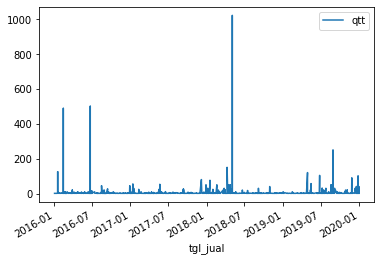

In [13]:
# visualisasi data 
dtg_viz=dtg.plot()

In [14]:
# resampling ke data bulanan deng menjumlahkan rata-rata
dtg_b=dtg.resample('M').mean()

<AxesSubplot:xlabel='tgl_jual'>

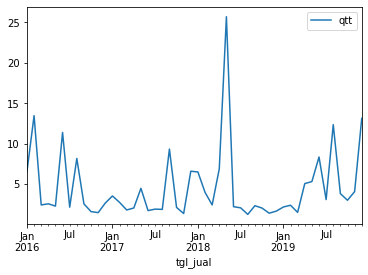

In [15]:
dtg_b.plot()

In [16]:
# Dekompose
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
seas_add=seasonal_decompose(dtg_b, model='additive')

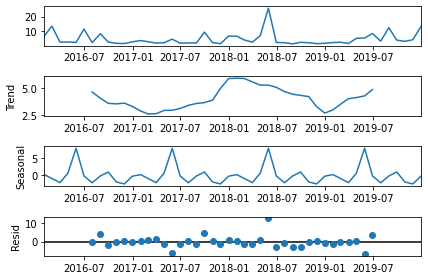

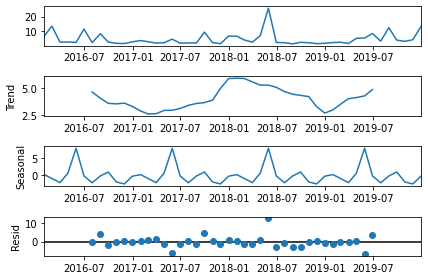

In [18]:
seas_add.plot()

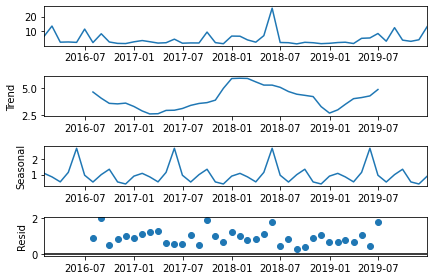

In [19]:
seas_mul=seasonal_decompose(dtg_b, model='multiplicative').plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

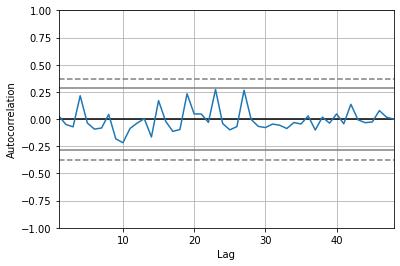

In [20]:
# plot autocorelasi 
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dtg_b)

In [21]:
# dari ploting autocorrelation di atas, maka nilai p berada di sekitar 3 p=3, 
# nilai diff dapat dilihat dari trend line yang lebih mengarah ke polinomial d=2
# q untuk banyaknya windows untuk MA q=1

In [22]:
# lihat partial autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf

/home/alif/Documents/dtstAkhir/venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


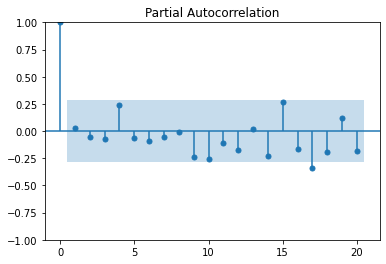

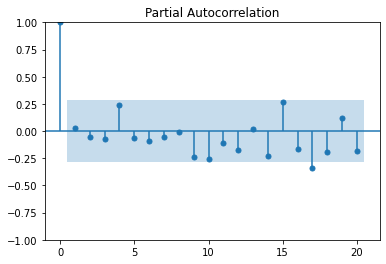

In [23]:
plot_pacf(dtg_b,lags=20)

# Model ARIMA

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
model=ARIMA((dtg_b),order=(3,2,1))

In [26]:
fit_model=model.fit()

In [27]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    qtt   No. Observations:                   48
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -140.381
Date:                Mon, 04 Oct 2021   AIC                            290.763
Time:                        17:47:16   BIC                            299.906
Sample:                    01-31-2016   HQIC                           294.188
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7166      0.120     -5.993      0.000      -0.951      -0.482
ar.L2         -0.5526      0.138     -3.994      0.000      -0.824      -0.281
ar.L3         -0.4406      0.085     -5.191      0.000      -0.607      -0.274
ma.L1         -0.9998     27.368     -0.037      0.971     -54.640      52.640
sigma2        22.5758    615.391      0.037      0.971   -1183.569    1228.721
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                49.31
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             1.09
Prob(H) (two-sided):                  0.81   Kurtosis:                         7.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

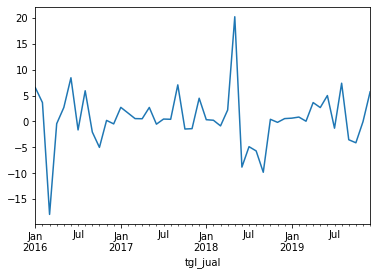

In [28]:
#plot residu
residu=fit_model.resid.plot()

In [29]:
hasil_pred=fit_model.forecast(5)
hasil_pred

2020-01-31    6.428142
2020-02-29    5.770932
2020-03-31    5.972649
2020-04-30    9.165033
2020-05-31    7.072119
Freq: M, Name: predicted_mean, dtype: float64

In [30]:
yh=fit_model.predict()
yh.head()

tgl_jual
2016-01-31     0.000000
2016-02-29     9.812446
2016-03-31    20.388188
2016-04-30     2.994354
2016-05-31    -0.423963
Freq: M, Name: predicted_mean, dtype: float64

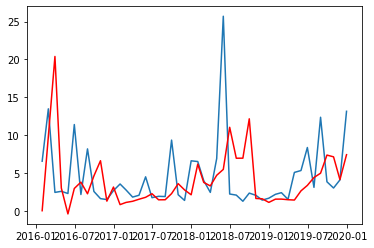

In [31]:
plt.plot(dtg_b)
plt.plot(yh,color='red')

In [35]:
uk_train=int(dtg_b.shape[0]*0.8)
X=dtg_b.values
train, test =X[0:uk_train],X[uk_train:]

In [36]:
test

array([[ 1.5       ],
       [ 5.0625    ],
       [ 5.31034483],
       [ 8.35294118],
       [ 3.08695652],
       [12.35294118],
       [ 3.82142857],
       [ 3.        ],
       [ 4.07317073],
       [13.13953488]])

prediksi=1.492578, observasi=1.500000
prediksi=1.421487, observasi=5.062500
prediksi=2.710669, observasi=5.310345
prediksi=3.408548, observasi=8.352941
prediksi=4.710301, observasi=3.086957
prediksi=4.890790, observasi=12.352941
prediksi=7.400910, observasi=3.821429
prediksi=7.350162, observasi=3.000000
prediksi=4.280168, observasi=4.073171
prediksi=7.006092, observasi=13.139535
Test RMSE: 4.149


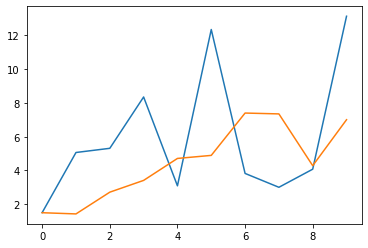

In [38]:
# Evaluasi dengan model walk forward arima
# split train dan test

log= [x for x in train]
lst_prediksi = list()

for t in range(len(test)):
	model = ARIMA(log, order=(3,2,1))
	fit_model = model.fit()
	hasil = fit_model.forecast()
	yh = hasil[0]
	lst_prediksi.append(yh)
	obs = test[t]
	log.append(obs)
	print('prediksi=%f, observasi=%f' % (yh, obs))
    
# evaluasi forcast
rmse = sqrt(mean_squared_error(test, lst_prediksi))
print('Test RMSE: %.3f' % rmse)
# plot forecasts vs outcomes
plt.plot(test)
plt.plot(lst_prediksi)
plt.show()